<a href="https://colab.research.google.com/github/syamkrishnanharidas/DATA_ANALYTICS_PYTHON_ASSIGNMENT/blob/main/EXIT_TEST_CUST_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT RELEVANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


Problem Statement: The Telecom Retention Challenge: Predicting Customer Churn

Use ML models to  analyze these factors and create a predictive model that can identify customers likely to leave in the future.

# LOAD DATASET

In [158]:
rd = pd.read_csv('/content/customer_churn.csv')
rd

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 2.UNDERSTANDING THE DATA

In [11]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [12]:
rd['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [51]:
rd['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0.0,5896
1.0,1140


In [53]:
rd['Partner'].value_counts()

,count
Partner,
No,3641
Yes,3402


In [15]:
rd['Dependents'].value_counts()

,count
Dependents,
No,4933
Yes,2110


In [113]:
rd['tenure'].value_counts()

,count
tenure,
1.0,611
72.0,362
2.0,238
3.0,200
4.0,176
...,...
28.0,57
39.0,56
44.0,51


In [165]:
rd['PhoneService'].value_counts()

,count
PhoneService,
Yes,6349
No,681


In [164]:
rd['MultipleLines'].value_counts()

,count
MultipleLines,
No,3382
Yes,2967
No phone service,681


In [20]:
rd['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3081
DSL,2407
No,1518


In [21]:
rd['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,3492
Yes,2013
No internet service,1523


In [22]:
rd['OnlineBackup'].value_counts()

,count
OnlineBackup,
No,3083
Yes,2422
No internet service,1523


In [23]:
rd['DeviceProtection'].value_counts()

,count
DeviceProtection,
No,3090
Yes,2415
No internet service,1523


In [24]:
rd['TechSupport'].value_counts()

,count
TechSupport,
No,3466
Yes,2039
No internet service,1523


In [25]:
rd['StreamingTV'].value_counts()

,count
StreamingTV,
No,2802
Yes,2699
No internet service,1520


In [26]:
rd['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2780
Yes,2726
No internet service,1523


In [27]:
rd['Contract'].value_counts()

,count
Contract,
Month-to-month,3860
Two year,1692
One year,1466


In [28]:
rd['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
Yes,4165
No,2864


In [29]:
rd['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1611
Bank transfer (automatic),1544
Credit card (automatic),1522


In [30]:
rd['MonthlyCharges'].value_counts()

,count
MonthlyCharges,
20.05,61
19.85,45
19.90,44
19.95,44
19.70,43
...,...
21.45,1
87.75,1
73.10,1


In [183]:
rd['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
19.9,8
19.65,8
...,...
6849.4,1
692.35,1
130.15,1


In [33]:
rd['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


# LOAD DATAFRAME

In [180]:
df=pd.DataFrame(rd)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# MISSING VALUE HANDLING

In [212]:
# are there any missing values in the data? deal with them
df.isnull().sum()
# check if there are missing values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [190]:
# fill ['SeniorCitizen'] with mean
df.fillna({'SeniorCitizen': df['SeniorCitizen'].median()},inplace=True)

In [191]:
# fill ['tenure'] with mean
df.fillna({'tenure': df['tenure'].median()},inplace=True)

In [192]:
# fill ['PhoneService'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'PhoneService':df['PhoneService'].mode()[0]},inplace=True)

In [193]:
# fill ['MultipleLines'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'MultipleLines':df['MultipleLines'].mode()[0]},inplace=True)

In [194]:
# fill ['InternetService'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'InternetService':df['InternetService'].mode()[0]},inplace=True)

In [195]:
# fill ['OnlineSecurity'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'OnlineSecurity':df['OnlineSecurity'].mode()[0]},inplace=True)

In [196]:
# fill ['OnlineBackup'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'OnlineBackup':df['OnlineBackup'].mode()[0]},inplace=True)

In [197]:
# fill ['DeviceProtection'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'DeviceProtection':df['DeviceProtection'].mode()[0]},inplace=True)

In [198]:
# fill ['TechSupport'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'TechSupport':df['TechSupport'].mode()[0]},inplace=True)

In [199]:
# fill ['StreamingTV'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'StreamingTV':df['StreamingTV'].mode()[0]},inplace=True)

In [200]:
# fill ['StreamingMovies'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'StreamingMovies':df['StreamingMovies'].mode()[0]},inplace=True)

In [201]:
# fill ['Contract'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'Contract':df['Contract'].mode()[0]},inplace=True)

In [202]:
# fill ['PaperlessBilling'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'PaperlessBilling':df['PaperlessBilling'].mode()[0]},inplace=True)

In [203]:
# fill ['PaymentMethod'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'PaymentMethod':df['PaymentMethod'].mode()[0]},inplace=True)

In [204]:
# fill ['MonthlyCharges'] with mean
df.fillna({'MonthlyCharges': df['MonthlyCharges'].mean()},inplace=True)

In [267]:
# fill ['TotalCharges'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'TotalCharges':df['TotalCharges'].median()},inplace=True)

In [265]:
df['TotalCharges'].mean()

np.float64(2280.9653059775665)

In [266]:
df['TotalCharges'].median()

1397.3

# REMOVAL OF DUPLICATE VALUES

In [206]:
# are there any duplicates in the data? deal with them
df.duplicated().sum()

np.int64(0)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


# 3.MODIFICATIONS TO DATASET

## GENDER :

In [213]:
df['gender']=df['gender'].map({'Female':1,'Male':0})
df['gender'].value_counts()

,count
gender,
0,3555
1,3488


## SeniorCitizen

In [214]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(bool)
df['SeniorCitizen']=df['SeniorCitizen'].astype(int)
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5903
1,1140


## Partner

In [215]:
df['Partner']=df['Partner'].map({'Yes':1,'No':0})
df['Partner'].value_counts()

,count
Partner,
0,3641
1,3402


## Dependents

In [216]:
df['Dependents']=df['Dependents'].map({'Yes':1,'No':0})
df['Dependents'].value_counts()

,count
Dependents,
0,4933
1,2110


## PhoneService

In [217]:
df['PhoneService']=df['PhoneService'].map({'Yes':1,'No':0})
df['PhoneService'].value_counts()

,count
PhoneService,
1,6362
0,681


## MultipleLines

In [218]:
df['MultipleLines']=df['MultipleLines'].map({'Yes':1,'No':0.5,'No phone service':0})
df['MultipleLines'].value_counts()

,count
MultipleLines,
0.5,3395
1.0,2967
0.0,681


## InternetService

In [219]:
df['InternetService']=df['InternetService'].map({'Fiber optic':1,'DSL':0.5,'No':0})
df['InternetService'].value_counts()

,count
InternetService,
1.0,3118
0.5,2407
0.0,1518


## OnlineSecurity

In [220]:
df['OnlineSecurity']=df['OnlineSecurity'].map({'Yes':1,'No':0.5,'No internet service':0})
df['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
0.5,3507
1.0,2013
0.0,1523


## OnlineBackup

In [221]:
df['OnlineBackup']=df['OnlineBackup'].map({'Yes':1,'No':0.5,'No internet service':0})
df['OnlineBackup'].value_counts()

,count
OnlineBackup,
0.5,3098
1.0,2422
0.0,1523


## DeviceProtection

In [222]:
df['DeviceProtection']=df['DeviceProtection'].map({'Yes':1,'No':0.5,'No internet service':0})
df['DeviceProtection'].value_counts()

,count
DeviceProtection,
0.5,3105
1.0,2415
0.0,1523


## TechSupport

In [223]:
df['TechSupport']=df['TechSupport'].map({'Yes':1,'No':0.5,'No internet service':0})
df['TechSupport'].value_counts()

,count
TechSupport,
0.5,3481
1.0,2039
0.0,1523


## StreamingTV

In [224]:
df['StreamingTV']=df['StreamingTV'].map({'Yes':1,'No':0.5,'No internet service':0})
df['StreamingTV'].value_counts()

,count
StreamingTV,
0.5,2824
1.0,2699
0.0,1520


## StreamingMovies

In [225]:
df['StreamingMovies']=df['StreamingMovies'].map({'Yes':1,'No':0.5,'No internet service':0})
df['StreamingMovies'].value_counts()

,count
StreamingMovies,
0.5,2794
1.0,2726
0.0,1523


## Contract

In [226]:
df['Contract']=df['Contract'].map({'Month-to-month':0,'Two year':1,'One year':0.5})
df['Contract'].value_counts()

,count
Contract,
0.0,3885
1.0,1692
0.5,1466


## PaperlessBilling

In [227]:
df['PaperlessBilling']=df['PaperlessBilling'].map({'Yes':1,'No':0})
df['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
1,4179
0,2864


## PaymentMethod

In [228]:
df['PaymentMethod']=df['PaymentMethod'].map({'Electronic check':1,'Mailed check':0.66,'Bank transfer (automatic)':0.33,'Credit card (automatic)':0})
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
1.00,2366
0.66,1611
0.33,1544
0.00,1522


## TotalCharges

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].value_counts()

,count
TotalCharges,
20.20,11
19.75,9
19.90,8
19.65,8
20.05,8
...,...
6849.40,1
692.35,1
130.15,1


## Churn

In [230]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


#Step 4: Removing Irrelevant columns and Checking for Outliers





In [268]:
df1=pd.DataFrame(df)
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1.0,0,0.0,0.5,0.5,...,0.5,0.5,0.5,0.5,0.0,1,1.00,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34.0,1,0.5,0.5,1.0,...,1.0,0.5,0.5,0.5,0.5,0,0.66,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2.0,1,0.5,0.5,1.0,...,0.5,0.5,0.5,0.5,0.0,1,0.66,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45.0,0,0.0,0.5,1.0,...,1.0,1.0,0.5,0.5,0.5,0,0.33,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2.0,1,0.5,1.0,0.5,...,0.5,0.5,0.5,0.5,0.0,1,1.00,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24.0,1,1.0,0.5,1.0,...,1.0,1.0,1.0,1.0,0.5,1,0.66,84.80,1990.50,0
7039,2234-XADUH,1,0,1,1,72.0,1,1.0,1.0,0.5,...,1.0,0.5,1.0,1.0,0.5,1,0.00,103.20,7362.90,0
7040,4801-JZAZL,1,0,1,1,11.0,0,0.0,0.5,1.0,...,0.5,0.5,0.5,0.5,0.0,1,1.00,29.60,346.45,0
7041,8361-LTMKD,0,1,1,0,4.0,1,1.0,1.0,0.5,...,0.5,0.5,0.5,0.5,0.0,1,0.66,74.40,306.60,1


In [269]:
# remove irrelevant columns  : do not add any useful information for analysis
irr_col = ['customerID']
# customerID
df1 = df1.drop(columns=irr_col)
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# INFO

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   float64
 8   InternetService   7043 non-null   float64
 9   OnlineSecurity    7043 non-null   float64
 10  OnlineBackup      7043 non-null   float64
 11  DeviceProtection  7043 non-null   float64
 12  TechSupport       7043 non-null   float64
 13  StreamingTV       7043 non-null   float64
 14  StreamingMovies   7043 non-null   float64
 15  Contract          7043 non-null   float64
 16  PaperlessBilling  7043 non-null   int64  


In [234]:
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


# Step 6: Scaling the data

In [242]:
from sklearn.preprocessing import StandardScaler
# StandardScaler (for normal distributions) - Recommended for most ML models.
scaler = StandardScaler()
num_cols = ["tenure", "MonthlyCharges","TotalCharges"]
df1.loc[:,num_cols] = scaler.fit_transform(df1[num_cols])
# MinMaxScaler (for non-normal distributions) - Maps values between 0 and 1.

In [270]:
df1.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [245]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [275]:
df_nontree=pd.DataFrame(df1)
df_nontree

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1.0,0,0.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.0,1,1.00,29.85,29.85,0
1,0,0,0,0,34.0,1,0.5,0.5,1.0,0.5,1.0,0.5,0.5,0.5,0.5,0,0.66,56.95,1889.50,0
2,0,0,0,0,2.0,1,0.5,0.5,1.0,1.0,0.5,0.5,0.5,0.5,0.0,1,0.66,53.85,108.15,1
3,0,0,0,0,45.0,0,0.0,0.5,1.0,0.5,1.0,1.0,0.5,0.5,0.5,0,0.33,42.30,1840.75,0
4,1,0,0,0,2.0,1,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1,1.00,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,1.0,0.5,1.0,0.5,1.0,1.0,1.0,1.0,0.5,1,0.66,84.80,1990.50,0
7039,1,0,1,1,72.0,1,1.0,1.0,0.5,1.0,1.0,0.5,1.0,1.0,0.5,1,0.00,103.20,7362.90,0
7040,1,0,1,1,11.0,0,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.0,1,1.00,29.60,346.45,0
7041,0,1,1,0,4.0,1,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1,0.66,74.40,306.60,1


# Model preparation:

In [276]:
# split data into target and features :::   Non Tree models
X_nontree = df_nontree.drop('Churn',axis=1)
y_nontree = df_nontree['Churn']

In [277]:
from sklearn.model_selection import train_test_split

X_train_nontree, X_test_nontree, y_train_nontree, y_test_nontree = train_test_split(X_nontree, y_nontree, test_size=0.25,random_state=42)

In [278]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_nontree,y_train_nontree)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [279]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

y_pred  = lr.predict(X_test_nontree)

print(confusion_matrix(y_test_nontree,y_pred))
print(classification_report(y_test_nontree,y_pred))
print(accuracy_score(y_test_nontree,y_pred))

[[1161  121]
 [ 205  274]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1282
           1       0.69      0.57      0.63       479

    accuracy                           0.81      1761
   macro avg       0.77      0.74      0.75      1761
weighted avg       0.81      0.81      0.81      1761

0.814877910278251


## Naive BAyers Model

In [280]:
# uses the concept of conditional probability

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_nontree,y_train_nontree)

#predict
y_pred = gnb.predict(X_test_nontree)

#metrics
print(confusion_matrix(y_test_nontree,y_pred))
print(classification_report(y_test_nontree,y_pred))
print(accuracy_score(y_test_nontree,y_pred))

[[897 385]
 [ 82 397]]
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1282
           1       0.51      0.83      0.63       479

    accuracy                           0.73      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.81      0.73      0.75      1761

0.7348097671777399


In [281]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1.0,0,0.0,0.5,0.5,...,0.5,0.5,0.5,0.5,0.0,1,1.00,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34.0,1,0.5,0.5,1.0,...,1.0,0.5,0.5,0.5,0.5,0,0.66,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2.0,1,0.5,0.5,1.0,...,0.5,0.5,0.5,0.5,0.0,1,0.66,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45.0,0,0.0,0.5,1.0,...,1.0,1.0,0.5,0.5,0.5,0,0.33,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2.0,1,0.5,1.0,0.5,...,0.5,0.5,0.5,0.5,0.0,1,1.00,70.70,151.65,1


In [283]:
# split into X and Y

X = df1.drop('Churn',axis=1)
y = df1['Churn']

# plit into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Decison Tree

In [ ]:
# fit Decison Tree
from sklearn.tree import DecisionTreeClassifier
# fit Decison Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
# PREDICT
y_pred_dt = dt.predict(X_test)
# METRIC
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))

[[65 12]
 [23 84]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        77
           1       0.88      0.79      0.83       107

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184

0.8097826086956522


## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
# PREDICT
y_pred_rf = rf.predict(X_test)
# METRIC
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))

[[66 11]
 [11 96]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

0.8804347826086957


## What happens next?



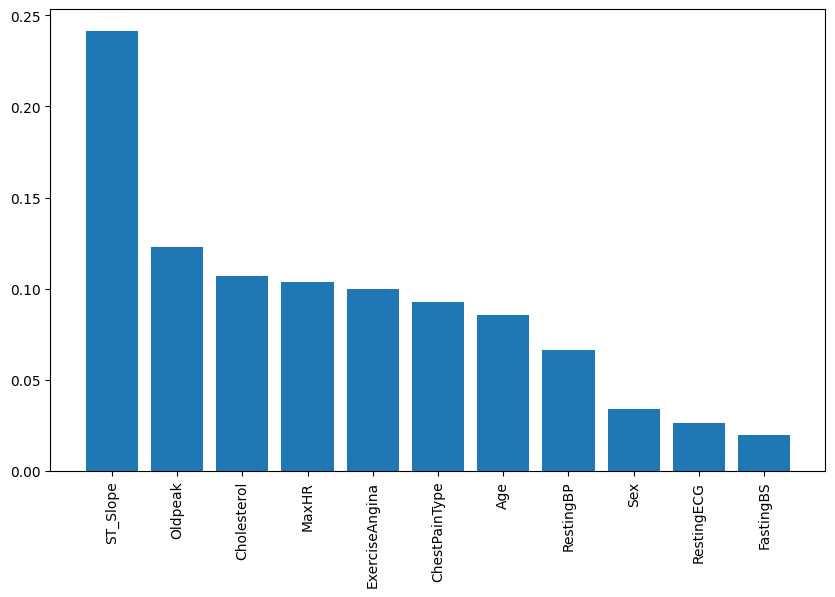

In [ ]:
# get feature importance scores
importances = rf.feature_importances_

#sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
features = X.columns

#plot the feature importances
plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]),importances[indices],align='center')
plt.xticks(range(X.shape[1]),features[indices],rotation=90)
plt.show()